In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import nltk 
import re 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('C:\Users\DELL\OneDrive\Desktop\Atharv\PREP\Projects\Amazon fine food review\Amazon fine food review\Reviews.csv'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
reviews = pd.read_csv('Reviews.csv')
reviews = reviews[:10001]
reviews.shape

(10001, 10)

In [3]:
def review_rating(Score):
    if Score>3:
        return 1
    elif Score<3:
        return -1
    else:
        return 0
    
reviews['Rating'] = reviews['Score'].apply(lambda x : review_rating(x))
print("")
reviews.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text', 'Rating'],
      dtype='object')

In [4]:
reviews.shape


(10001, 11)

In [5]:
duplicates = reviews.duplicated(subset ={'UserId' ,"ProfileName","Time","Text"})
duplicates.sum()

485

In [6]:
reviews = reviews.drop_duplicates(subset ={'UserId' ,"ProfileName","Time","Text"}, keep='first', inplace=False)
reviews =reviews.reset_index(drop =True)
reviews.shape

(9516, 11)

In [7]:
reviews.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Rating
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,-1
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1


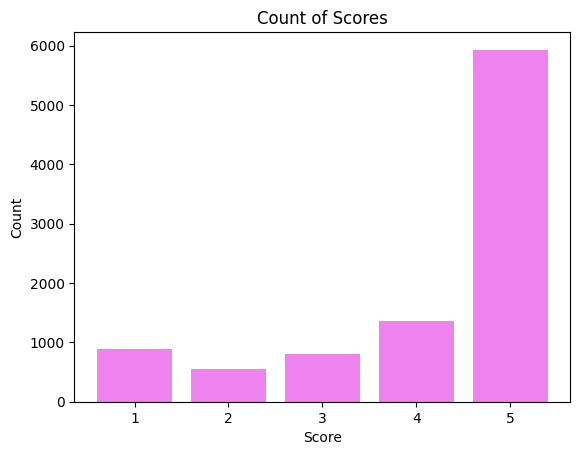

In [8]:
score_counts = reviews['Score'].value_counts().sort_index()
plt.bar(score_counts.index, score_counts.values, color='violet')
plt.title("Count of Scores")
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()


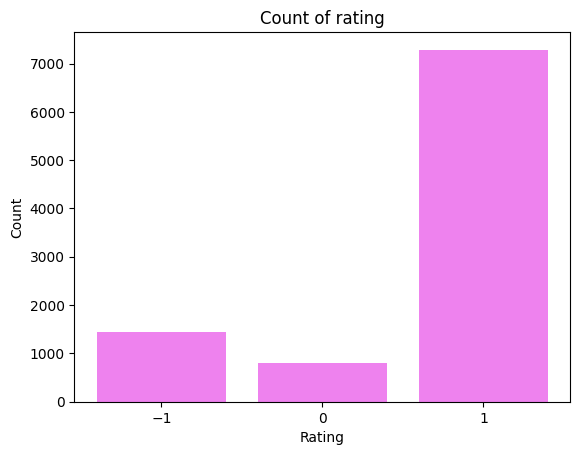

In [9]:
rating_counts = reviews['Rating'].value_counts().sort_index()
plt.bar(rating_counts.index, rating_counts.values, color='violet')
plt.title("Count of rating")
plt.xlabel('Rating')
plt.xticks(range(-1 ,2))
plt.ylabel('Count')
plt.show()


In [10]:
reviews.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Rating
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,-1
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1


In [11]:
reviews =reviews.drop('ProfileName' , axis = 1)
reviews.shape

(9516, 10)

In [12]:
reviews.head(5)

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Rating
0,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1
2,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,-1
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1


In [13]:
reviews.head(5)

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Rating
0,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1
2,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,-1
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1


In [14]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer

all_stopwords = stopwords.words('english')

def preprocess_text(Text):
    if Text is not None and len(Text.strip()) > 0:
        review = re.sub(r'<.*?>', '', Text)  
        review = re.sub(r'http\S+', '', review)  
        review = re.sub(r'[^a-zA-Z\s]', '', review)  
        review = review.lower()  
        review = review.split()
        review = [word for word in review if not word in set(all_stopwords)]
        review = ' '.join(review)
        return review
    else:
        return ''

reviews['CleanedText'] = reviews['Text'].apply(preprocess_text)

# reviews.drop('text', axis=1, inplace=True)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
reviews.head(5)

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Rating,CleanedText
0,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,bought several vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1,product arrived labeled jumbo salted peanutsth...
2,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1,confection around centuries light pillowy citr...
3,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,-1,looking secret ingredient robitussin believe f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1,great taffy great price wide assortment yummy ...


In [16]:
reviews['Cleaned_summary'] = reviews['Summary'].apply(preprocess_text)
reviews.drop('Summary' , axis =1 , inplace =True)

In [17]:
reviews.head(5)

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Text,Rating,CleanedText,Cleaned_summary
0,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,1303862400,I have bought several of the Vitality canned d...,1,bought several vitality canned dog food produc...,good quality dog food
1,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,1346976000,Product arrived labeled as Jumbo Salted Peanut...,-1,product arrived labeled jumbo salted peanutsth...,advertised
2,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,1219017600,This is a confection that has been around a fe...,1,confection around centuries light pillowy citr...,delight says
3,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,1307923200,If you are looking for the secret ingredient i...,-1,looking secret ingredient robitussin believe f...,cough medicine
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,1350777600,Great taffy at a great price. There was a wid...,1,great taffy great price wide assortment yummy ...,great taffy


In [18]:
reviews = reviews.reindex(columns=[c for c in reviews if c != 'Rating'] + ['Rating'])


In [19]:
reviews.head(5)

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Text,CleanedText,Cleaned_summary,Rating
0,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,1303862400,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...,good quality dog food,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,1346976000,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanutsth...,advertised,-1
2,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,1219017600,This is a confection that has been around a fe...,confection around centuries light pillowy citr...,delight says,1
3,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,1307923200,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...,cough medicine,-1
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,1350777600,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...,great taffy,1


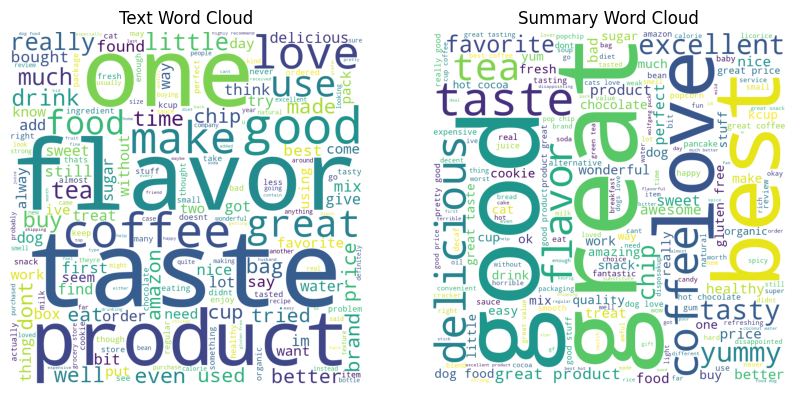

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# create a WordCloud object for the 'Text' column
text_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(reviews['CleanedText']))

# create a WordCloud object for the 'Summary' column
summary_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(reviews['Cleaned_summary']))

# plot the word clouds
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].imshow(text_wordcloud)
axes[0].set_title('Text Word Cloud')
axes[0].axis('off')
axes[1].imshow(summary_wordcloud)
axes[1].set_title('Summary Word Cloud')
axes[1].axis('off')
plt.show()


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features=1000) 
tf_text = tf.fit_transform(reviews['CleanedText'].values)
print(tf_text.shape)
tf_text_toarray = tf_text.toarray()
text_df = pd.DataFrame(tf_text_toarray, columns=range(tf_text_toarray.shape[1]))
reviews = pd.concat([reviews, text_df], axis=1)
reviews.head()

(9516, 1000)


,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Text,CleanedText,Cleaned_summary,...,990,991,992,993,994,995,996,997,998,999
0,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,1303862400,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...,good quality dog food,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,1346976000,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanutsth...,advertised,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,1219017600,This is a confection that has been around a fe...,confection around centuries light pillowy citr...,delight says,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.236751
3,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,1307923200,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...,cough medicine,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,1350777600,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...,great taffy,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.447437


In [22]:
tf_summary = tf.fit_transform(reviews['Cleaned_summary'].values)
print(tf_summary.shape)
tf_summary_toarray = tf_summary.toarray()
summary_df = pd.DataFrame(tf_summary_toarray, columns=range(tf_summary_toarray.shape[1]))
reviews = pd.concat([reviews, summary_df], axis=1)
reviews.head()

(9516, 1000)


,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Text,CleanedText,Cleaned_summary,...,990,991,992,993,994,995,996,997,998,999
0,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,1303862400,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...,good quality dog food,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,1346976000,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanutsth...,advertised,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,1219017600,This is a confection that has been around a fe...,confection around centuries light pillowy citr...,delight says,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,1307923200,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...,cough medicine,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,1350777600,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...,great taffy,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
reviews.head(5)

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Text,CleanedText,Cleaned_summary,...,990,991,992,993,994,995,996,997,998,999
0,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,1303862400,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...,good quality dog food,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,1346976000,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanutsth...,advertised,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,1219017600,This is a confection that has been around a fe...,confection around centuries light pillowy citr...,delight says,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,1307923200,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...,cough medicine,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,1350777600,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...,great taffy,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
feature_names = tf.get_feature_names_out()

# print the first 10 feature names
print(feature_names[:10])

# print the TF-IF scores for the first document in the cleaned text column
print(tf_text[200].toarray())

# print the TF-IDF scores for the first document in the cleaned summary column
print(tf_summary[0].toarray())

['absolute' 'absolutely' 'acidic' 'actual' 'actually' 'add' 'added'
 'addicted' 'addicting' 'addictive']
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.19431835 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.       

In [25]:
reviews.drop('ProductId'  ,axis =1 , inplace =True)

In [26]:
reviews.drop('UserId' , axis =1 ,inplace =True)

In [27]:
reviews.head(5)

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Text,CleanedText,Cleaned_summary,Rating,0,...,990,991,992,993,994,995,996,997,998,999
0,1,1,1,5,1303862400,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...,good quality dog food,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,0,1,1346976000,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanutsth...,advertised,-1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,1,4,1219017600,This is a confection that has been around a fe...,confection around centuries light pillowy citr...,delight says,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,3,3,2,1307923200,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...,cough medicine,-1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0,0,5,1350777600,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...,great taffy,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
x = reviews.drop(["CleanedText", "Cleaned_summary", "Rating"], axis=1).values
y = reviews[["Rating"]].values

In [40]:
import warnings
warnings.filterwarnings("ignore")